In [6]:
import numpy as np

In [42]:
#Generate data from a Gaussian, fit a covariance matrix and simulate data from it
def generate_data(n_classes,dim,n_samples):
    #Generate random positive semi-definite matrix
    data=[]
    for cl in range(n_classes):
        A = np.random.rand(dim, dim)
        cov = A@A.T
        mean=np.random.rand(dim)
        data.append(np.random.multivariate_normal(mean,cov,size=(n_samples)))
    return data
    
#Convenience functions
def calc_cov(n_classes,data):
    covs=[]
    for cl in range(n_classes):
        covs.append(np.cov(data[cl].T))
    return covs

def calc_mean(n_classes,data):
    means=[]
    for cl in range(n_classes):
        means.append(np.mean(data[cl],axis=0))
    return means

def simulate(n_classes,covs,means,n_samples):
    sim_data=[]
    for cl in range(n_classes):
        sim_data.append(np.random.multivariate_normal(means[cl],covs[cl],size=(n_samples)))
    return sim_data

In [43]:
n_classes=3
dim=10
n_samples=1000
data=generate_data(n_classes,dim,n_samples)
covs=calc_cov(n_classes,data)
means=calc_mean(n_classes,data)
sim_data=simulate(n_classes,covs,means,n_samples)

In [46]:
print(sim_data[0].shape)
print(data[0].shape)

(1000, 10)
(1000, 10)


(array([ 12.,  36., 118., 192., 248., 202., 139.,  44.,   6.,   3.]),
 array([-3.09390593, -2.29486932, -1.49583271, -0.6967961 ,  0.1022405 ,
         0.90127711,  1.70031372,  2.49935033,  3.29838693,  4.09742354,
         4.89646015]),
 <a list of 10 Patch objects>)

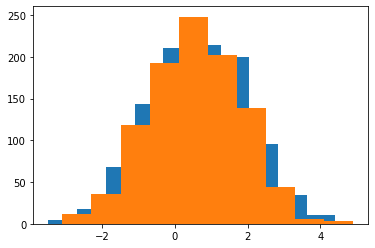

In [47]:
import matplotlib.pyplot as plt
plt.hist(sim_data[0][:,0])
plt.hist(data[0][:,0])